In [1]:
from __future__ import print_function, division
from builtins import range

In [2]:
import numpy as np
import tensorflow as tf
import q_learning

In [5]:
class SGDRegressor:
    def __init__(self, D):
        print("Hello TensorFlow!")
        lr = 10e-2
        
        # create inputs, targets, params
        # matmul doesn't like when w is 1-D
        # so we make it 2-D and then flatten rhe prediction
        self.w = tf.Variable(tf.random_normal(shape=(D, 1)), name= 'w')
        self.X = tf.placeholder(tf.float32, shape = (None, D), name = 'X')
        self.Y = tf.placeholder(tf.float32, shape = (None,), name = 'Y')
        
        #make prediction and cost
        Y_hat = tf.reshape(tf.matmul(self.X, self.w), [-1])
        delta = self.Y - Y_hat
        cost = tf.reduce_sum(delta * delta)
        
        # ops we cant to call later
        self.train_op = tf.train.GradientDescentOptimizer(lr).minimize(cost)
        self.predict_op = Y_hat
        
        # start the session and initialize params
        init = tf.global_variables_initializer()
        self.session = tf.InteractiveSession()
        self.session.run(init)

    
    def partial_fit(self, X, Y):
        self.session.run(self.train_op, feed_dict={self.X: X, self.Y: Y})
        
    def predict(self, X):
        return self.session.run(self.predict_op, feed_dict={self.X: X})

Hello TensorFlow!
Hello TensorFlow!
episode: 0 total reward: 13.0 eps: 1.0 avg reward (last 100): 13.0
episode: 100 total reward: 146.0 eps: 0.099503719021 avg reward (last 100): 110.346534653
episode: 200 total reward: 187.0 eps: 0.0705345615859 avg reward (last 100): 150.128712871
episode: 300 total reward: 199.0 eps: 0.0576390417704 avg reward (last 100): 181.346534653
episode: 400 total reward: 199.0 eps: 0.0499376169439 avg reward (last 100): 197.445544554
avg reward for last 100 episodes: 195.63
total steps: 83398.0


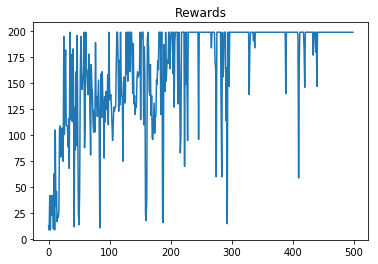

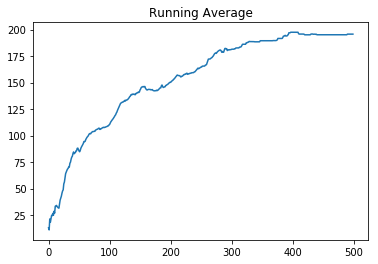

In [6]:
if __name__ == '__main__':
    q_learning.SGDRegressor = SGDRegressor
    q_learning.main()